In [1]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145907&authkey=AEafDmEGTS9nfOU"

--2019-05-23 18:04:15--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145907&authkey=AEafDmEGTS9nfOU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kwo77w.am.files.1drv.com/y4mKP9nTM-g4rgH5figz6srahoEUOvaW40UudmmoHDnceoyMQV7HO4yxsIJPaWxinqsx-3kWMUrxIVDD2k6jb-rXFsM4PJIhYD2kGA2_nmDB6pMlkzte9KLQhhLbfBb7eFAcBoVAUWbTrW_hIQU1etjFK9YKsjdUalYMYuGbOV3jJvw9Ncrh6GylkJhprEYk_3fPbe-7KuyrN6LpnOeyKLD7g/PUC_50k.zip?download&psid=1 [following]
--2019-05-23 18:04:21--  https://kwo77w.am.files.1drv.com/y4mKP9nTM-g4rgH5figz6srahoEUOvaW40UudmmoHDnceoyMQV7HO4yxsIJPaWxinqsx-3kWMUrxIVDD2k6jb-rXFsM4PJIhYD2kGA2_nmDB6pMlkzte9KLQhhLbfBb7eFAcBoVAUWbTrW_hIQU1etjFK9YKsjdUalYMYuGbOV3jJvw9Ncrh6GylkJhprEYk_3fPbe-7KuyrN6LpnOeyKLD7g/PUC_50k.zip?download&psid=1
Resolving kwo77w.am.files.1drv.com (kwo77w.am.files.1drv.com)

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45907&authkey=AEafDmEGTS9nfOU"

In [6]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import os


data_dir = './PUC_50k'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 58, 58, 16)        432       
_________________________________________________________________
batch_normalization_3 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        2304      
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
__________

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=128,
        class_mode='binary'
        )

Found 59751 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [8]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=313, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=79, 
                              callbacks=[es]
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
313/313 [==============================] - 54s 173ms/step - loss: 0.0149 - acc: 0.9960 - val_loss: 0.3749 - val_acc: 0.9015
Epoch 2/100
313/313 [==============================] - 49s 158ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.4448 - val_acc: 0.9020
Epoch 3/100
313/313 [==============================] - 48s 152ms/step - loss: 0.0025 - acc: 0.9994 - val_loss: 0.5491 - val_acc: 0.8589
Epoch 4/100
313/313 [==============================] - 48s 154ms/step - loss: 0.0012 - acc: 0.9998 - val_loss: 1.5320 - val_acc: 0.7426
Epoch 5/100
313/313 [==============================] - 48s 155ms/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.6796 - val_acc: 0.8725
Epoch 6/100
313/313 [==============================] - 47s 150ms/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.7186 - val_acc: 0.8745
Epoch 7/100
313/313 [==============================] - 50s 161ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.7213 - val_acc: 0.8621


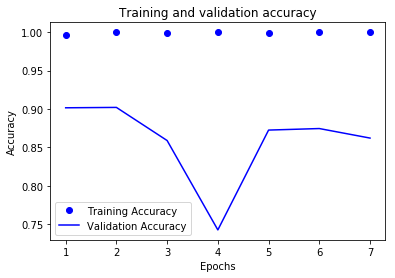

In [9]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [10]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-23 18:10:35--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mxct-LCZAYKIueXvUnjClfOS98fX_vcGhis3mkABRz6IHNTdS0BDgpro71wXj-1iorY1aDdjPFjqE5iMAJniDmOQaJu4IKPvERw1kDx_MtSFffJaV0hJiWjyB3E3AQfn6tVttoEnZKgKfITkDel-xK2ZmecQayS1Un0WMPrEFizIqA5j81s5H3j5rQDdCU8pemnuk2Apt5uV8gj3xjxmqGQ/CNR_TEST.zip?download&psid=1 [following]
--2019-05-23 18:10:35--  https://mwrg1q.am.files.1drv.com/y4mxct-LCZAYKIueXvUnjClfOS98fX_vcGhis3mkABRz6IHNTdS0BDgpro71wXj-1iorY1aDdjPFjqE5iMAJniDmOQaJu4IKPvERw1kDx_MtSFffJaV0hJiWjyB3E3AQfn6tVttoEnZKgKfITkDel-xK2ZmecQayS1Un0WMPrEFizIqA5j81s5H3j5rQDdCU8pemnuk2Apt5uV8gj3xjxmqGQ/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [12]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )



model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.47792801111936567, 0.8987499892711639]

In [13]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


result = model.predict_generator(test_generator,20)
print(result[1])

[1.04010105e-05]


In [14]:
for i in range (0,128):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()
    print(result[i])
    print(y_batch[i])


NameError: ignored